### Comenzamos este analisis de un dataset de Google Ads. Con la pregunta principal, que es:
*Hay manera de detectar en las busquedas realizadas oportunidades de negocios aprovechables con potencial de ganancia?*

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datos_google_ads.csv")
df.head()

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
0,servicios financieros,ARS,880.0,0%,0%,Medium,36.0,24.57,480.39,NaN,...,880.0,880.0,880.0,720.0,880.0,720.0,880.0,1000.0,1000.0,1000.0
1,sector economico,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
2,sectores economicos,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
3,sector cuaternario,ARS,880.0,0%,0%,Low,0.0,NaN,NaN,NaN,...,880.0,1000.0,1300.0,390.0,50.0,260.0,1000.0,1300.0,1600.0,1300.0
4,sector primario secundario y terciario,ARS,1000.0,0%,30%,Low,0.0,NaN,NaN,NaN,...,1000.0,1000.0,1600.0,720.0,90.0,390.0,1000.0,1300.0,1600.0,1300.0


In [3]:
df.shape

(403, 26)

In [4]:
df.describe()

,Avg. monthly searches,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,Organic impression share,Organic average position,In account?,In plan?,Searches: Jul 2022,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
count,376.000000,240.000000,110.000000,110.000000,0.0,0.0,0.0,0.0,0.0,376.000000,...,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,113.138298,26.166667,38.743545,319.398273,NaN,NaN,NaN,NaN,NaN,92.739362,...,112.606383,112.952128,125.159574,84.547872,84.175532,89.468085,130.132979,127.819149,140.292553,116.010638
std,458.770231,26.130453,35.709426,754.744091,NaN,NaN,NaN,NaN,NaN,415.741197,...,462.479825,458.961794,503.767117,381.102692,436.267638,420.783059,541.089995,540.896076,608.280786,481.952739
min,0.000000,0.000000,1.420000,4.280000,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,2.000000,9.952500,72.070000,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,17.000000,33.010000,139.105000,NaN,NaN,NaN,NaN,NaN,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,20.000000,42.250000,51.297500,247.842500,NaN,NaN,NaN,NaN,NaN,10.000000,...,20.000000,20.000000,20.000000,10.000000,10.000000,10.000000,20.000000,20.000000,20.000000,20.000000
max,5400.000000,100.000000,191.110000,5460.370000,NaN,NaN,NaN,NaN,NaN,5400.000000,...,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,6600.000000,5400.000000


Vamos a revisar si hay palabras duplicadas en la columna Keyword

In [5]:
print(df['Keyword'].duplicated().sum())


0


Ahora se eliminara los valores nulos de determinadas columnas

In [6]:
df = df.drop(columns=['Ad impression share'])

In [7]:
#Chequeamos si se elimino
df

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Organic impression share,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
0,servicios financieros,ARS,880.0,0%,0%,Medium,36.0,24.57,480.39,NaN,...,880.0,880.0,880.0,720.0,880.0,720.0,880.0,1000.0,1000.0,1000.0
1,sector economico,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
2,sectores economicos,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
3,sector cuaternario,ARS,880.0,0%,0%,Low,0.0,NaN,NaN,NaN,...,880.0,1000.0,1300.0,390.0,50.0,260.0,1000.0,1300.0,1600.0,1300.0
4,sector primario secundario y terciario,ARS,1000.0,0%,30%,Low,0.0,NaN,NaN,NaN,...,1000.0,1000.0,1600.0,720.0,90.0,390.0,1000.0,1300.0,1600.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,consultoria sector cuaternario,ARS,10.0,0%,∞,Low,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0
399,la economia primaria,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0
400,sector economico de claro,ARS,10.0,0%,-100%,Unknown,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
401,sector agropecuario economia,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,NaN,...,10.0,10.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0


chequeamos la columna 'Organic impression share' que aparentemente posee en su mayoria valores NA

In [8]:
print(df['Organic impression share'])

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
398   NaN
399   NaN
400   NaN
401   NaN
402   NaN
Name: Organic impression share, Length: 403, dtype: float64


In [9]:
#Aparentemente en suu mayoria son valores nulos
#Procedemos a contarlos
na_values = df['Organic impression share'].isna().sum()
na_values

np.int64(403)

In [10]:
#En efecto todos los valores de dicha columna son NA
#Procedemos a eliminar la columna
df.drop(columns=['Organic impression share'], inplace=True)
#chequeamos
df

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Organic average position,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
0,servicios financieros,ARS,880.0,0%,0%,Medium,36.0,24.57,480.39,NaN,...,880.0,880.0,880.0,720.0,880.0,720.0,880.0,1000.0,1000.0,1000.0
1,sector economico,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
2,sectores economicos,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
3,sector cuaternario,ARS,880.0,0%,0%,Low,0.0,NaN,NaN,NaN,...,880.0,1000.0,1300.0,390.0,50.0,260.0,1000.0,1300.0,1600.0,1300.0
4,sector primario secundario y terciario,ARS,1000.0,0%,30%,Low,0.0,NaN,NaN,NaN,...,1000.0,1000.0,1600.0,720.0,90.0,390.0,1000.0,1300.0,1600.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,consultoria sector cuaternario,ARS,10.0,0%,∞,Low,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0
399,la economia primaria,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0
400,sector economico de claro,ARS,10.0,0%,-100%,Unknown,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
401,sector agropecuario economia,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,NaN,...,10.0,10.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0


In [11]:
#Vemos que ocurre lo mismo con la columna 'Organic average position'
na_values2 = df['Organic average position'].isna().sum()
na_values2

np.int64(403)

In [12]:
#Procedemos a eliminar la columna con valores NA en su totalidad
df.drop(columns=['Organic average position'], inplace= True)
#Chequeamos
df

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),In account?,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
0,servicios financieros,ARS,880.0,0%,0%,Medium,36.0,24.57,480.39,NaN,...,880.0,880.0,880.0,720.0,880.0,720.0,880.0,1000.0,1000.0,1000.0
1,sector economico,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
2,sectores economicos,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
3,sector cuaternario,ARS,880.0,0%,0%,Low,0.0,NaN,NaN,NaN,...,880.0,1000.0,1300.0,390.0,50.0,260.0,1000.0,1300.0,1600.0,1300.0
4,sector primario secundario y terciario,ARS,1000.0,0%,30%,Low,0.0,NaN,NaN,NaN,...,1000.0,1000.0,1600.0,720.0,90.0,390.0,1000.0,1300.0,1600.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,consultoria sector cuaternario,ARS,10.0,0%,∞,Low,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0
399,la economia primaria,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0
400,sector economico de claro,ARS,10.0,0%,-100%,Unknown,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
401,sector agropecuario economia,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,NaN,...,10.0,10.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0


In [13]:
#Hay mas columnas con valore NA
#Se procede a eliminar
df.drop(columns=['In account?'], inplace= True)
#Chequeamos
df

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),In plan?,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
0,servicios financieros,ARS,880.0,0%,0%,Medium,36.0,24.57,480.39,NaN,...,880.0,880.0,880.0,720.0,880.0,720.0,880.0,1000.0,1000.0,1000.0
1,sector economico,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
2,sectores economicos,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
3,sector cuaternario,ARS,880.0,0%,0%,Low,0.0,NaN,NaN,NaN,...,880.0,1000.0,1300.0,390.0,50.0,260.0,1000.0,1300.0,1600.0,1300.0
4,sector primario secundario y terciario,ARS,1000.0,0%,30%,Low,0.0,NaN,NaN,NaN,...,1000.0,1000.0,1600.0,720.0,90.0,390.0,1000.0,1300.0,1600.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,consultoria sector cuaternario,ARS,10.0,0%,∞,Low,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0
399,la economia primaria,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0
400,sector economico de claro,ARS,10.0,0%,-100%,Unknown,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
401,sector agropecuario economia,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,NaN,...,10.0,10.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0


In [14]:
#Seguimos con la columna contigua que cumple las mismas condiciones
#Posee valore Na
df.drop(columns=['In plan?'], inplace= True)
df.head()

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Searches: Jul 2022,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
0,servicios financieros,ARS,880.0,0%,0%,Medium,36.0,24.57,480.39,880.0,...,880.0,880.0,880.0,720.0,880.0,720.0,880.0,1000.0,1000.0,1000.0
1,sector economico,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,1300.0,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
2,sectores economicos,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,1300.0,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
3,sector cuaternario,ARS,880.0,0%,0%,Low,0.0,NaN,NaN,590.0,...,880.0,1000.0,1300.0,390.0,50.0,260.0,1000.0,1300.0,1600.0,1300.0
4,sector primario secundario y terciario,ARS,1000.0,0%,30%,Low,0.0,NaN,NaN,590.0,...,1000.0,1000.0,1600.0,720.0,90.0,390.0,1000.0,1300.0,1600.0,1300.0


COMO YA PODEMOS VER HEMOS ELIMINADO LAS COLUMNAS QUE NO APORTAN NINGUN VALOR (valores na) A NUESTRO ANALISIS

In [16]:
df

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Searches: Jul 2022,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
0,servicios financieros,ARS,880.0,0%,0%,Medium,36.0,24.57,480.39,880.0,...,880.0,880.0,880.0,720.0,880.0,720.0,880.0,1000.0,1000.0,1000.0
1,sector economico,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,1300.0,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
2,sectores economicos,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,1300.0,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
3,sector cuaternario,ARS,880.0,0%,0%,Low,0.0,NaN,NaN,590.0,...,880.0,1000.0,1300.0,390.0,50.0,260.0,1000.0,1300.0,1600.0,1300.0
4,sector primario secundario y terciario,ARS,1000.0,0%,30%,Low,0.0,NaN,NaN,590.0,...,1000.0,1000.0,1600.0,720.0,90.0,390.0,1000.0,1300.0,1600.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,consultoria sector cuaternario,ARS,10.0,0%,∞,Low,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0
399,la economia primaria,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,0.0,...,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0
400,sector economico de claro,ARS,10.0,0%,-100%,Unknown,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
401,sector agropecuario economia,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,0.0,...,10.0,10.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0


#Vemos que hay una defincion en la columna 'Competition' que esta establecida como "Unknown"
#Esto no suma ninguna claridad a nuestro analisis, justamente lo contrario, por ende se procede a eliminar


In [17]:
df = df.drop(df[df['Competition'] == 'Unknown'].index)
#chequeanos
df

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Searches: Jul 2022,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
0,servicios financieros,ARS,880.0,0%,0%,Medium,36.0,24.57,480.39,880.0,...,880.0,880.0,880.0,720.0,880.0,720.0,880.0,1000.0,1000.0,1000.0
1,sector economico,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,1300.0,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
2,sectores economicos,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,1300.0,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
3,sector cuaternario,ARS,880.0,0%,0%,Low,0.0,NaN,NaN,590.0,...,880.0,1000.0,1300.0,390.0,50.0,260.0,1000.0,1300.0,1600.0,1300.0
4,sector primario secundario y terciario,ARS,1000.0,0%,30%,Low,0.0,NaN,NaN,590.0,...,1000.0,1000.0,1600.0,720.0,90.0,390.0,1000.0,1300.0,1600.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,instituciones financieras cuales son,ARS,10.0,∞,∞,Low,29.0,NaN,NaN,0.0,...,0.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,10.0,10.0
398,consultoria sector cuaternario,ARS,10.0,0%,∞,Low,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0
399,la economia primaria,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,0.0,...,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0
401,sector agropecuario economia,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,0.0,...,10.0,10.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0


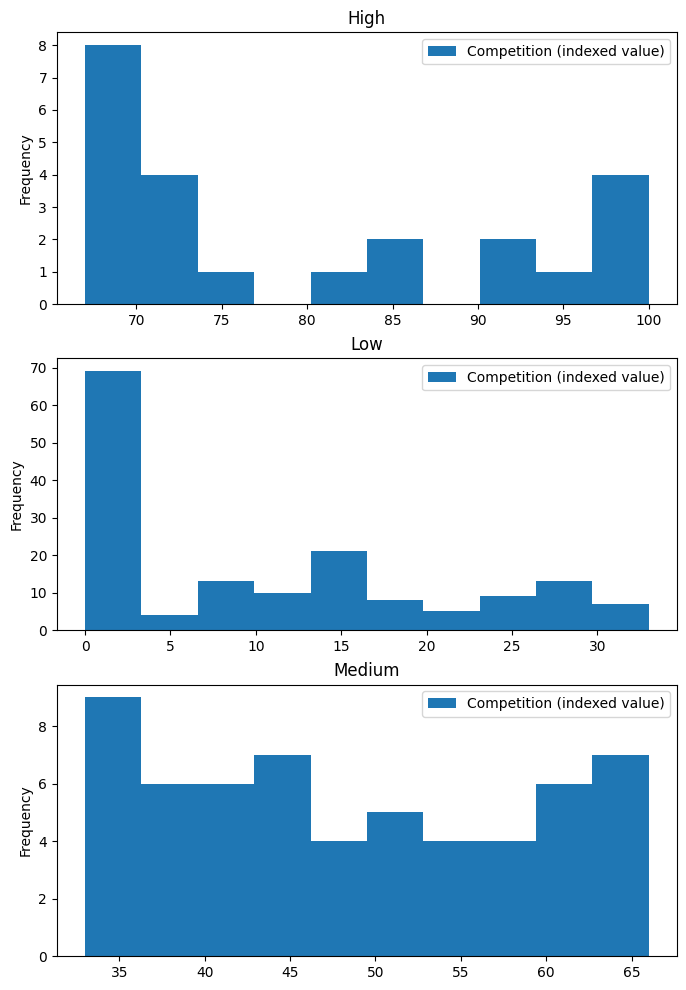

In [18]:
#Realizamos un histogrma para ver el comportamiento de la variable Competition con sus valores
ax= df.plot.hist(column=['Competition (indexed value)'], by='Competition', bins=10, figsize=(8,12))

<Axes: xlabel='Competition', ylabel='Avg. monthly searches'>

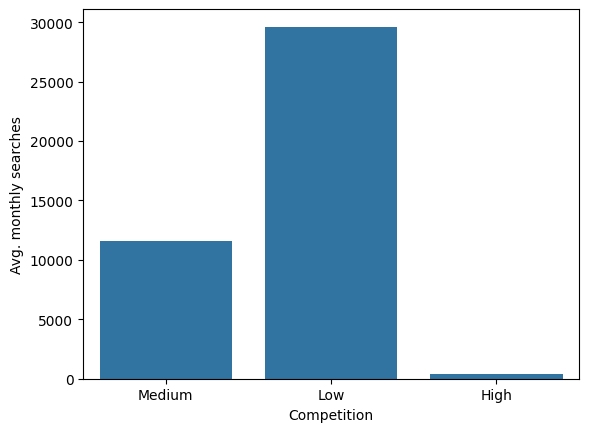

In [19]:
#Ahora sumaremos la cantidad de busquedas para cada nivel de competencia
sns.barplot(data=df, x='Competition', y="Avg. monthly searches", errorbar=None, estimator=sum)

Ya tenemos una aproximacion sobre los datos de dataSet y su comportamiento. Ahora trabajaremos con SQL desde aqui para seguir manipulando el dataSet

In [20]:
#Importamos lo necesario para trabajar con SQL
from sqlalchemy import engine
from pandasql import sqldf

#Funcion Lamda para correr Querys de SQL de manera mucho mas facil
pysqldf = lambda q: sqldf(q, globals())

*UN DETALLE IMPORTANTE:*
DEBEMOS RECORDAR QUE LOS ESPACIOS EN LOS NOMBRES DE LAS VARIABLES EN SQL, ROMPEN EN MOTOR DE FUNCIONAMIENTO
DEL GESTOR DE BASE DE DATOS.
POR ELLO SE DEBEN MODIFICAR DICHOS NOMBRES PARA QUE LA QUERY DE SQL CORRA SIN PROBLEMAS

In [22]:
df= df.rename(columns={"Avg. monthly searches":"avg_searches", "Competition (indexed value)":"competition_index"})
#chequeamos
df

,Keyword,Currency,avg_searches,Three month change,YoY change,Competition,competition_index,Top of page bid (low range),Top of page bid (high range),Searches: Jul 2022,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
0,servicios financieros,ARS,880.0,0%,0%,Medium,36.0,24.57,480.39,880.0,...,880.0,880.0,880.0,720.0,880.0,720.0,880.0,1000.0,1000.0,1000.0
1,sector economico,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,1300.0,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
2,sectores economicos,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,1300.0,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
3,sector cuaternario,ARS,880.0,0%,0%,Low,0.0,NaN,NaN,590.0,...,880.0,1000.0,1300.0,390.0,50.0,260.0,1000.0,1300.0,1600.0,1300.0
4,sector primario secundario y terciario,ARS,1000.0,0%,30%,Low,0.0,NaN,NaN,590.0,...,1000.0,1000.0,1600.0,720.0,90.0,390.0,1000.0,1300.0,1600.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,instituciones financieras cuales son,ARS,10.0,∞,∞,Low,29.0,NaN,NaN,0.0,...,0.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,10.0,10.0
398,consultoria sector cuaternario,ARS,10.0,0%,∞,Low,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0
399,la economia primaria,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,0.0,...,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0
401,sector agropecuario economia,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,0.0,...,10.0,10.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0


In [24]:
q = """
SELECT
Keyword,
avg_searches,
Competition,
competition_index
FROM df
WHERE avg_searches >= 500
"""
df_export = pysqldf(q)

#QUEREMOS QUE NOS FILTRE EL DATASET ORIGINAL CON LAS COLIMNAS ESTABLECIDAS DESPUES DEL select, DONDE LAS avg_searches
#SEAN MAYOR O IGUAL A 500
#LUEGO SE GUARDA EN LA VARIABLE df_export


In [25]:
df_export.to_csv("datos_google_ads_procesados.csv")

In [26]:
#Revisamos el dataset filtrado
df_export

,Keyword,avg_searches,Competition,competition_index
0,servicios financieros,880.0,Medium,36.0
1,sector economico,2400.0,Low,0.0
2,sectores economicos,2400.0,Low,0.0
3,sector cuaternario,880.0,Low,0.0
4,sector primario secundario y terciario,1000.0,Low,0.0
5,sectores de la economia,1000.0,Low,1.0
6,sector terciario ejemplos,880.0,Low,0.0
7,entidades financieras,720.0,Low,25.0
8,economia informal,720.0,Low,1.0
9,financieros,4400.0,Medium,37.0


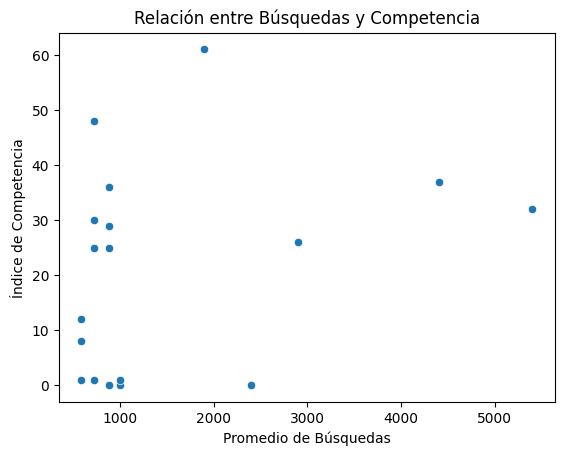

In [28]:
#Ahora para seguir con el EDA haremos un scatterPlot entre el promedio de busquedas y el indice de competencia
sns.scatterplot(x='avg_searches', y='competition_index', data=df_export)

# Añadir etiquetas a los ejes y un título
plt.xlabel('Promedio de Búsquedas')
plt.ylabel('Índice de Competencia')
plt.title('Relación entre Búsquedas y Competencia')

# Mostrar el gráfico
plt.show()

### Podemos apreciar que a medida que el indice de competencia es bajo las busquedas apenas superan el rango de las 1000 busquedas, a medida que el nivel de competencia aumenta las busquedas mayores a 1000 son muy pocas.
### Lo que el gráfico sugiere es que no hay una correlación clara entre el número de búsquedas y el índice de competencia. Esto implica que podrías encontrar palabras clave con un alto volumen de búsquedas pero con poca competencia, lo cual es una gran oportunidad para optimizar tus campañas de Google Ads.*

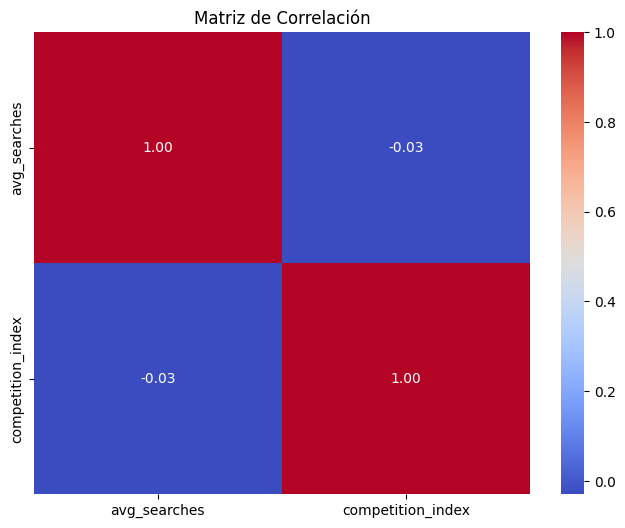

In [29]:
#Para despejar la hipotesis de la baja correlacion poddemos realizar una matriz de correlacion
matriz = df[['avg_searches','competition_index']].corr()

# Visualizar la matriz de correlación con un heatMap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

*Validamos la hipotesis, no hay una correlacion directa, esta es muy baja entre las variables y es del tipo negativa.*